In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np

%matplotlib inline

In [3]:
import datetime

In [166]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190629, 190622, 190615]
df = get_data(week_nums)

In [167]:
#Challenge 2
df['DATETIME'] = pd.to_datetime(df['DATE']+' '+df['TIME'],format="%m/%d/%Y %H:%M:%S")
df

def timebin(element):
    if element >=6 and element <= 11:
        return "breakfast"
    elif element >11 and element <=16:
        return "lunch"
    elif element > 16 and element <=23:
        return "dinner"
    else: 
        return "midnight snack"

df['hours']= df['DATETIME'].dt.hour.apply(timebin)


    C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/22/2019  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/22/2019  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/22/2019  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/22/2019  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  06/22/2019  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  7107725   
1  REGULAR  7107738   
2  REGULAR  7107761   
3  REGULAR  7107858   
4  REGULAR  7108075   

   EXITS                                                                 \
0                                            2407457                      
1                                            2407465                      
2                                            2407491                      
3                                            2407541                      
4                                  

In [168]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,hours
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00,midnight snack
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00,midnight snack
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00,breakfast
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00,lunch
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00,lunch


In [174]:
df1 = df.groupby(['STATION', 'hours']).sum()
df1

ENTRIES  \
STATION         hours                          
1 AV            breakfast        33938184531   
                dinner           29696138383   
                lunch            59392013535   
                midnight snack   59391739493   
103 ST          breakfast         4117642648   
                dinner            7502270633   
                lunch             3780925053   
                midnight snack    7489891572   
103 ST-CORONA   breakfast         1725326656   
                dinner            1510028010   
                lunch             3019873902   
                midnight snack    3019345434   
104 ST          breakfast       104645939499   
                dinner           99797245876   
                lunch           199594468048   
                midnight snack  199594386454   
110 ST          breakfast          977311709   
                dinner             800543155   
                lunch             1600944464   
                midnight snack    1600723044   
111 ST          breakfast         2936386997   
                dinner            4109373425   
                lunch             4139261287   
                midnight snack    5298880014   
116 ST          breakfast         9221764723   
                dinner           17323113010   
                lunch             8875281341   
                midnight snack   17667578369   
116 ST-COLUMBIA breakfast        27913041489   
                dinner           50972033807   
...                                      ...   
WILSON AV       lunch              805137421   
                midnight snack     805032816   
WINTHROP ST     breakfast          760809525   
                dinner            1183540714   
                lunch              591731891   
                midnight snack    1183350030   
WOODHAVEN BLVD  breakfast         2198732013   
                dinner            3152310915   
                lunch             3353932783   
                midnight snack    4374714044   
WOODLAWN        breakfast          643547308   
                dinner             643627066   
                lunch             1287175703   
                midnight snack    1270697411   
WORLD TRADE CTR breakfast        46339519538   
                dinner           33555781522   
                lunch            67110869815   
                midnight snack   67110659136   
WTC-CORTLANDT   breakfast        15422760623   
                dinner           30841434470   
                lunch            15422550090   
                midnight snack   30841044748   
YORK ST         breakfast          882191663   
                dinner            1795222926   
                lunch              897497054   
                midnight snack    1794881818   
ZEREGA AV       breakfast           40315056   
                dinner              80678865   
                lunch               40324940   
                midnight snack      80592866   

                                EXITS                                                                 
STATION         hours                                                                                 
1 AV            breakfast                                             35144942682                     
                dinner                                                30752045862                     
                lunch                                                 61503804790                     
                midnight snack                                        61503473512                     
103 ST          breakfast                                             15340728894                     
                dinner                                                26136449067                     
                lunch                                                 13093870724                     
                midnight snack                                        26125106393    

In [176]:
df.columns = df.columns.str.strip()

In [177]:
#Sanity check whether turnstile entries are unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
495719,R249,R179,01-05-00,86 ST,2019-06-27 04:00:00,2
471051,R229,R143,01-00-00,28 ST,2019-06-27 17:00:00,2
495723,R249,R179,01-05-00,86 ST,2019-06-27 08:00:00,2
437830,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
495715,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2


In [178]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((df["C/A"] == "R249") & 
(df["UNIT"] == "R179") & 
(df["SCP"] == "01-05-00") & 
(df["STATION"] == "86 ST") &
(df["DATETIME"].dt.date == datetime.datetime(2019, 6, 27).date()))

#Get rid of duplicate entries
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [179]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-08 00:00:00,1
412237,R139,R031,04-00-01,34 ST-PENN STA,2019-06-09 04:00:00,1
412239,R139,R031,04-00-01,34 ST-PENN STA,2019-06-09 12:00:00,1
412240,R139,R031,04-00-01,34 ST-PENN STA,2019-06-09 16:00:00,1
412241,R139,R031,04-00-01,34 ST-PENN STA,2019-06-09 20:00:00,1


In [180]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

#Exercise 1.3   <br/>These counts are for every n hours (What is n?). Also, there's something odd about these "counts", what is it? Do they actually represent total entries for a time period, or something else? We want total daily entries, create a new dataframe with one row per turnstile/day and a column that gives total daily entries.

In [182]:
#Challenge 3
#diff = df.iloc[0,-1]-df.iloc[1,-1]
print('time difference between entries: '+str(diff)+' hours')
print('Entries and Exits represent the total no. of Entries and Exits over the lifetime of the turnstile.')

time difference between entries: 0 days 04:00:00 hours
Entries and Exits represent the total no. of Entries and Exits over the lifetime of the turnstile.


In [183]:
turnstiles_daily = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first())
turnstiles_daily_time = (turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATETIME"],as_index=False).ENTRIES.first())

In [184]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
turnstiles_daily_time[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_time
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATETIME", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
turnstiles_daily_time.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [185]:
#Check for data where Entries are higher than previous entries
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1618,A025,R023,01-03-01,34 ST-HERALD SQ,06/09/2019,1238319051,06/08/2019,1.238321e+09
1619,A025,R023,01-03-01,34 ST-HERALD SQ,06/10/2019,1238315556,06/09/2019,1.238319e+09
1620,A025,R023,01-03-01,34 ST-HERALD SQ,06/11/2019,1238311656,06/10/2019,1.238316e+09
1621,A025,R023,01-03-01,34 ST-HERALD SQ,06/12/2019,1238307580,06/11/2019,1.238312e+09
1622,A025,R023,01-03-01,34 ST-HERALD SQ,06/13/2019,1238303571,06/12/2019,1.238308e+09


In [186]:
#Counter is working in reverse
mask = ((turnstiles_df["C/A"] == "A025") & 
(turnstiles_df["UNIT"] == "R023") & 
(turnstiles_df["SCP"] == "01-03-01") & 
(turnstiles_df["STATION"] == "34 ST-HERALD SQ") &
(turnstiles_df["DATETIME"].dt.date == datetime.datetime(2019, 6, 9).date()))

#How many have that problem?
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())


C/A    UNIT  SCP       STATION        
A025   R023  01-03-01  34 ST-HERALD SQ    20
A037   R170  05-00-00  14 ST-UNION SQ      1
A038   R085  00-06-00  8 ST-NYU            1
A049   R088  02-05-00  CORTLANDT ST       19
A066   R118  00-00-00  CANAL ST           20
C021   R212  00-00-02  59 ST              18
             00-00-03  59 ST               1
D010   R394  00-00-03  BAY PKWY            1
D011   R394  01-06-00  BAY PKWY           20
             01-06-01  BAY PKWY           20
H001   R175  00-06-00  8 AV                1
H003   R163  01-00-02  6 AV               20
H023   R236  00-06-00  DEKALB AV          20
J001   R460  01-06-02  MARCY AV            1
J034   R007  00-00-02  104 ST             20
JFK02  R535  01-00-03  HOWARD BCH JFK      1
JFK03  R536  00-03-04  JFK JAMAICA CT1     2
K026   R100  00-00-01  METROPOLITAN AV    20
N006A  R280  00-00-00  190 ST             20
N057   R188  00-00-04  50 ST               1
N062A  R010  00-06-01  42 ST-PORT AUTH     1
N063A  R011  00-

In [187]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=200000)
turnstiles_daily_time["HOURLY_ENTRIES"] = turnstiles_daily_time.apply(get_daily_counts, axis=1, max_counter=10000)

In [188]:
turnstiles_daily_time.head(20)

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,PREV_DATE,PREV_ENTRIES,HOURLY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-06-08 04:00:00,7089491,2019-06-08 00:00:00,7089463.0,28.0
2,A002,R051,02-00-00,59 ST,2019-06-08 08:00:00,7089511,2019-06-08 04:00:00,7089491.0,20.0
3,A002,R051,02-00-00,59 ST,2019-06-08 12:00:00,7089598,2019-06-08 08:00:00,7089511.0,87.0
4,A002,R051,02-00-00,59 ST,2019-06-08 16:00:00,7089801,2019-06-08 12:00:00,7089598.0,203.0
5,A002,R051,02-00-00,59 ST,2019-06-08 20:00:00,7090115,2019-06-08 16:00:00,7089801.0,314.0
6,A002,R051,02-00-00,59 ST,2019-06-09 00:00:00,7090281,2019-06-08 20:00:00,7090115.0,166.0
7,A002,R051,02-00-00,59 ST,2019-06-09 04:00:00,7090306,2019-06-09 00:00:00,7090281.0,25.0
8,A002,R051,02-00-00,59 ST,2019-06-09 08:00:00,7090321,2019-06-09 04:00:00,7090306.0,15.0
9,A002,R051,02-00-00,59 ST,2019-06-09 12:00:00,7090416,2019-06-09 08:00:00,7090321.0,95.0
10,A002,R051,02-00-00,59 ST,2019-06-09 16:00:00,7090629,2019-06-09 12:00:00,7090416.0,213.0


In [189]:
#Challenge 6
stations_daily = turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index()  

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/09/2019,5882.0
1,1 AV,06/10/2019,17396.0
2,1 AV,06/11/2019,18648.0
3,1 AV,06/12/2019,19660.0
4,1 AV,06/13/2019,20170.0


Every Sunday, Station 59 ST has the lowest numbers of passengers of the week


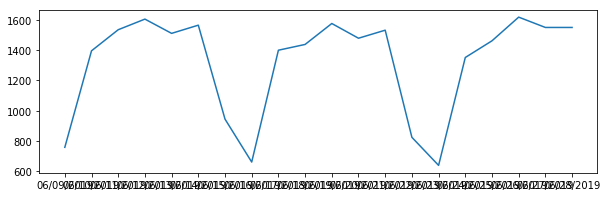

In [190]:
#Challenge 4
%matplotlib inline
import matplotlib.pyplot as plt
dates = list(turnstiles_daily['DATE'].unique())
counts = turnstiles_daily['DAILY_ENTRIES'][0:len(dates)]

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

print('Every Sunday, Station '+str(turnstiles_daily.iloc[0, 3])+' has the lowest numbers of passengers of the week')

#Challenge 5 <br/>
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

In [191]:
#Challenge 5
entries = turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION','DATE'])['DAILY_ENTRIES'].sum().reset_index()
entries.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,06/09/2019,6576.0
1,A002,R051,59 ST,06/10/2019,11971.0
2,A002,R051,59 ST,06/11/2019,13392.0
3,A002,R051,59 ST,06/12/2019,13919.0
4,A002,R051,59 ST,06/13/2019,13660.0


In [192]:
entries[entries.DAILY_ENTRIES ==0]

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
830,A082,R028,FULTON ST,06/22/2019,0.0
831,A082,R028,FULTON ST,06/23/2019,0.0
877,A085,R125,BROAD ST,06/09/2019,0.0
878,A085,R125,BROAD ST,06/10/2019,0.0
879,A085,R125,BROAD ST,06/11/2019,0.0
880,A085,R125,BROAD ST,06/12/2019,0.0
881,A085,R125,BROAD ST,06/13/2019,0.0
882,A085,R125,BROAD ST,06/14/2019,0.0
883,A085,R125,BROAD ST,06/15/2019,0.0
884,A085,R125,BROAD ST,06/16/2019,0.0


In [193]:
entries.DAILY_ENTRIES.replace(0, np.nan, inplace=True)

In [194]:
entries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14898 entries, 0 to 14897
Data columns (total 5 columns):
C/A              14898 non-null object
UNIT             14898 non-null object
STATION          14898 non-null object
DATE             14898 non-null object
DAILY_ENTRIES    14736 non-null float64
dtypes: float64(1), object(4)
memory usage: 582.0+ KB


In [195]:
entries.fillna(entries.DAILY_ENTRIES.mean(), inplace=True)
entries[(entries.DAILY_ENTRIES == 0)]

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES


In [196]:
#Test whether '0' entries are gone
entries[(entries['STATION'] == '34 ST-PENN STA')].describe()

,DAILY_ENTRIES
count,260.000000
mean,11906.954805
std,10691.618441
min,156.000000
25%,6357.750000
50%,7764.000000
75%,13726.500000
max,47880.000000


In [197]:
#Get Top 10 Stations
top10_stations = \
    (entries.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .head(10))
top10_stations

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,3.095808e+06
232,GRD CNTRL-42 ST,2.691637e+06
59,34 ST-HERALD SQ,2.293698e+06
46,23 ST,2.059062e+06
68,42 ST-PORT AUTH,1.944635e+06
352,TIMES SQ-42 ST,1.937293e+06
14,14 ST-UNION SQ,1.811196e+06
267,LACKAWANNA,1.757825e+06
225,FULTON ST,1.743728e+06
110,86 ST,1.531651e+06


In [153]:
stations_time = turnstiles_daily_time.groupby(['STATION','DATETIME'])['HOURLY_ENTRIES'].sum()
stations_time = turnstiles_daily_time[(turnstiles_daily_time.STATION == '34 ST-HERALD SQ')].groupby(['DATETIME'])['HOURLY_ENTRIES'].sum()
stations_time = stations_time.groupby([stations_time.index.hour]).sum().reset_index()
print(stations_time)

def timebin(element):
    if element >=6 and element <= 11:
        return "breakfast"
    elif element >11 and element <=16:
        return "lunch"
    elif element > 16 and element <=23:
        return "dinner"
    else: 
        return "midnight snack"
    
    

        

    DATETIME  HOURLY_ENTRIES
0          0        352242.0
1          4         59459.0
2          5            35.0
3          7          2360.0
4          8        120234.0
5          9           561.0
6         12        410325.0
7         13          6876.0
8         16        471530.0
9         17          8284.0
10        20        921881.0


In [149]:
stations_time['hours'] = stations_time['DATETIME'].apply(timebin)

stations_time = stations_time.groupby(['hours'])['HOURLY_ENTRIES'].sum()
stations_time

KeyError: 'DATETIME'

0     breakfast
1     breakfast
2     breakfast
3     breakfast
4     breakfast
5     breakfast
6     breakfast
7     breakfast
8     breakfast
9     breakfast
10    breakfast
Name: HOURS, dtype: object


In [27]:
#Checking for validitiy
entries[(entries.STATION == '34 ST-PENN STA')]

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
4359,N067,R012,34 ST-PENN STA,06/09/2019,13852.0
4360,N067,R012,34 ST-PENN STA,06/10/2019,25212.0
4361,N067,R012,34 ST-PENN STA,06/11/2019,24607.0
4362,N067,R012,34 ST-PENN STA,06/12/2019,24760.0
4363,N067,R012,34 ST-PENN STA,06/13/2019,25339.0
4364,N067,R012,34 ST-PENN STA,06/14/2019,23412.0
4365,N067,R012,34 ST-PENN STA,06/15/2019,14714.0
4366,N067,R012,34 ST-PENN STA,06/16/2019,14249.0
4367,N067,R012,34 ST-PENN STA,06/17/2019,26382.0
4368,N067,R012,34 ST-PENN STA,06/18/2019,25180.0


In [28]:
#Clean '0' from Stations_Daily_Time
turnstiles_daily_time.HOURLY_ENTRIES.replace(0, np.nan, inplace=True)
turnstiles_daily_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613477 entries, 1 to 618363
Data columns (total 9 columns):
C/A               613477 non-null object
UNIT              613477 non-null object
SCP               613477 non-null object
STATION           613477 non-null object
DATETIME          613477 non-null datetime64[ns]
ENTRIES           613477 non-null int64
PREV_DATE         613477 non-null datetime64[ns]
PREV_ENTRIES      613477 non-null float64
HOURLY_ENTRIES    521928 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 46.8+ MB


In [52]:
from collections import Counter
#Daily Entries for Stations including Time !!!
stations_time = turnstiles_daily_time.groupby(['STATION','DATETIME'])['HOURLY_ENTRIES'].sum().reset_index()



In [53]:
#Top 20 Stations including time
top20_stations_time = (turnstiles_daily_time.groupby(['STATION','DATETIME'])['HOURLY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='HOURLY_ENTRIES',ascending=False) 
                   .head(20))
top20_stations_time

,STATION,DATETIME,HOURLY_ENTRIES
10012,34 ST-HERALD SQ,2019-06-11 20:00:00,56999.0
10094,34 ST-HERALD SQ,2019-06-19 20:00:00,55577.0
10144,34 ST-HERALD SQ,2019-06-26 20:00:00,55322.0
10019,34 ST-HERALD SQ,2019-06-12 20:00:00,55108.0
10150,34 ST-HERALD SQ,2019-06-27 20:00:00,55028.0
10059,34 ST-HERALD SQ,2019-06-18 20:00:00,54664.0
10100,34 ST-HERALD SQ,2019-06-20 20:00:00,54653.0
10136,34 ST-HERALD SQ,2019-06-25 20:00:00,54565.0
10125,34 ST-HERALD SQ,2019-06-24 20:00:00,53935.0
10052,34 ST-HERALD SQ,2019-06-17 20:00:00,53673.0


In [40]:
#Check whether values are realistic
turnstiles_daily_time[(turnstiles_daily_time.STATION == '34 ST-PENN STA')&(turnstiles_daily_time.DATETIME == '2019-06-11 20:00:00')].sort_values(by='HOURLY_ENTRIES',ascending=False) 

,C/A,UNIT,SCP,STATION,DATETIME,ENTRIES,PREV_DATE,PREV_ENTRIES,HOURLY_ENTRIES
409801,R137,R031,02-03-00,34 ST-PENN STA,2019-06-11 20:00:00,65337,2019-06-11 16:00:00,63881.0,1456.0
160801,N068,R012,03-00-00,34 ST-PENN STA,2019-06-11 20:00:00,9891836,2019-06-11 16:00:00,9890573.0,1263.0
160927,N068,R012,03-00-01,34 ST-PENN STA,2019-06-11 20:00:00,8189531,2019-06-11 16:00:00,8188333.0,1198.0
161555,N069,R013,01-00-02,34 ST-PENN STA,2019-06-11 20:00:00,8572703,2019-06-11 16:00:00,8571517.0,1186.0
413517,R141,R031,00-06-00,34 ST-PENN STA,2019-06-11 20:00:00,1057592,2019-06-11 16:00:00,1056483.0,1109.0
161053,N068,R012,03-00-02,34 ST-PENN STA,2019-06-11 20:00:00,3720861,2019-06-11 16:00:00,3719805.0,1056.0
163195,N071,R013,00-00-04,34 ST-PENN STA,2019-06-11 20:00:00,871058,2019-06-11 16:00:00,870038.0,1020.0
161430,N069,R013,01-00-01,34 ST-PENN STA,2019-06-11 20:00:00,7781524,2019-06-11 16:00:00,7780514.0,1010.0
412761,R141,R031,00-00-00,34 ST-PENN STA,2019-06-11 20:00:00,7085539,2019-06-11 16:00:00,7084570.0,969.0
413391,R141,R031,00-03-04,34 ST-PENN STA,2019-06-11 20:00:00,5005955,2019-06-11 16:00:00,5005056.0,899.0


In [41]:
#Check Top 10 Stations for best time
station_time = turnstiles_daily_time[(turnstiles_daily_time.STATION == '34 ST-HERALD SQ')].groupby(['STATION','DATETIME'])['HOURLY_ENTRIES'].sum().reset_index()
station_time.head(50)
#Trying to apply a sort function to sort Hourly Entries in descending order to find the time with most Entries

,STATION,DATETIME,HOURLY_ENTRIES
0,34 ST-HERALD SQ,2019-06-08 04:00:00,4173.0
1,34 ST-HERALD SQ,2019-06-08 08:00:00,2347.0
2,34 ST-HERALD SQ,2019-06-08 12:00:00,9594.0
3,34 ST-HERALD SQ,2019-06-08 16:00:00,19897.0
4,34 ST-HERALD SQ,2019-06-08 20:00:00,24078.0
5,34 ST-HERALD SQ,2019-06-09 00:00:00,16993.0
6,34 ST-HERALD SQ,2019-06-09 04:00:00,3796.0
7,34 ST-HERALD SQ,2019-06-09 08:00:00,1730.0
8,34 ST-HERALD SQ,2019-06-09 12:00:00,7610.0
9,34 ST-HERALD SQ,2019-06-09 16:00:00,16133.0


In [43]:
from collections import Counter
#finding the average number of entries by hour at 34th street station
station_time = station_time.groupby(['DATETIME']).sum()
station_time = station_time.groupby([station_time.index.hour]).mean()

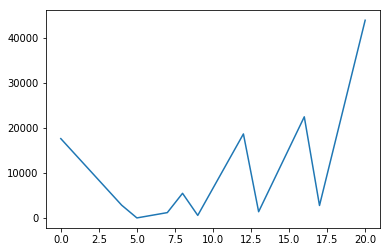

In [44]:
plt.plot(station_time)

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(station_time,annot=True);